In [0]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#----------DATA READING 
filename = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')
print(csv_data.head())


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0


![alt text](https://www.tensorflow.org/images/iris_three_species.jpg)

In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
#----------DATA CLEANUP 
csv_data.columns = column_names # new_header #set the header row as the data header
print(csv_data.head()) 
# look at simple data statistics
print(csv_data.describe().transpose())

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0
              count      mean       std  min    25%  50%    75%  max
sepal_length  120.0  5.845000  0.868578  4.4  5.075  5.8  6.425  7.9
sepal_width   120.0  3.065000  0.427156  2.0  2.800  3.0  3.300  4.4
petal_length  120.0  3.739167  1.822100  1.0  1.500  4.4  5.100  6.9
petal_width   120.0  1.196667  0.782039  0.1  0.300  1.3  1.800  2.5
species       120.0  1.000000  0.840168  0.0  0.000  1.0  2.000  2.0


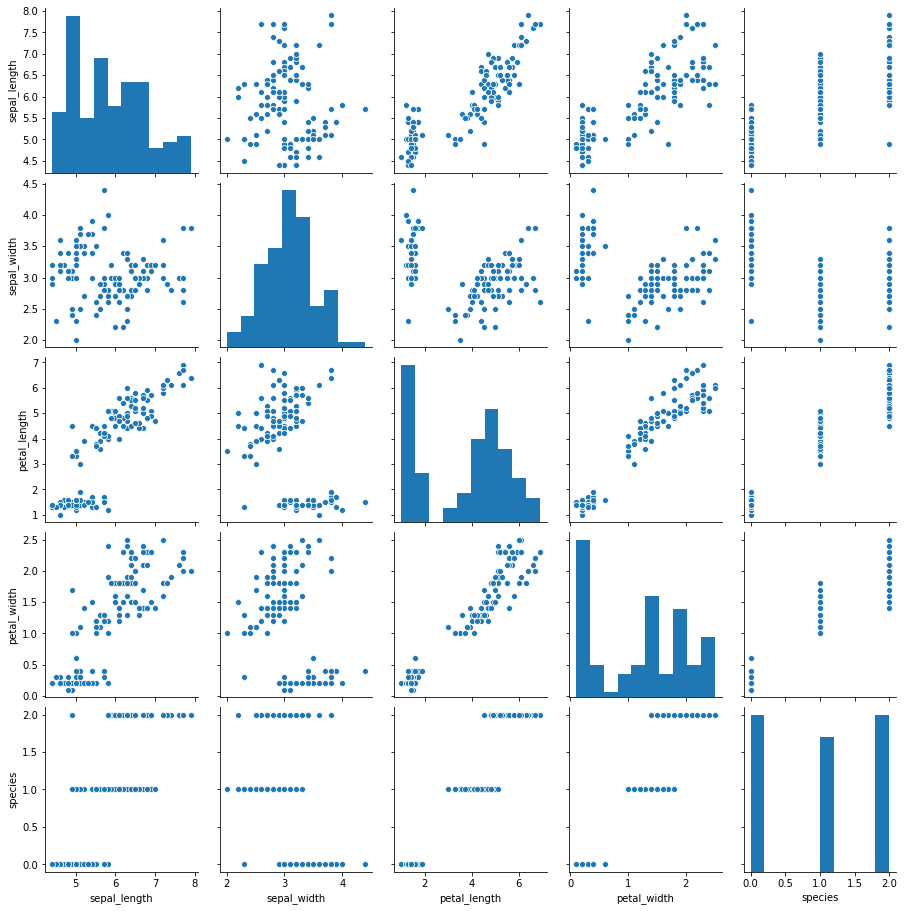

In [0]:
# plot of all features agains each other
sns.pairplot(csv_data)

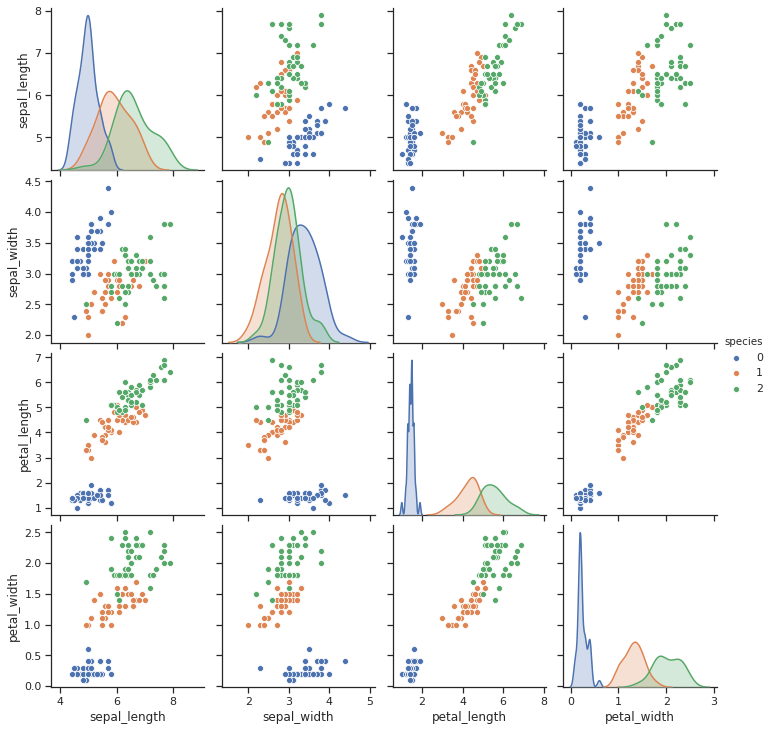

In [0]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(csv_data, hue='species') 

In [0]:
#----------TRAIN/TEST SPLIT 
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']
# normalize the training data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

# separate out the y (results) from x (features) testing
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']
# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
               count      mean       std  min       25%       50%       75%  max
sepal_length   96.0  0.425595  0.256607  0.0  0.192857  0.414286  0.600000  1.0
sepal_width    96.0  0.445747  0.177305  0.0  0.333333  0.416667  0.541667  1.0
petal_length   96.0  0.475459  0.316635  0.0  0.084746  0.584746  0.716102  1.0
petal_width    96.0  0.467014  0.331790  0.0  0.083333  0.500000  0.750000  1.0
Test Data
               count      mean       std  min       25%       50%       75%  max
sepal_length   24.0  0.361111  0.303379  0.0  0.114583  0.291667  0.583333  1.0
sepal_width    24.0  0.528646  0.276441  0.0  0.312500  0.531250  0.703125  1.0
petal_length   24.0  0.451087  0.355322  0.0  0.043478  0.554348  0.722826  1.0
petal_width    24.0  0.434783  0.317434  0.0  0.086957  0.521739  0.706522  1.0


In [0]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 3 nodes in the output for 'species'
    tf.keras.layers.Dense(3, name="Output_Layer")
  ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              # loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # list of metrics to monitor
              metrics=['acc',])

model.summary()

4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [0]:
#--------SANITY CHECK
# take an example batch and try to predict (we haven't trained yet!)
example_batch = x_train[:10]
# this gives the log probability of the the true class
example_result_log = model.predict(example_batch)
print('Likelihood', example_result_log)
# this gives the probability of the the true class (should sum up to 1)
example_result_prob = tf.nn.softmax(example_result_log).numpy()
# these values should be similar and equal to (1/3), because we haven't trained yet and weights are random
print('Probabilities', example_result_prob)


Likelihood [[-0.1124588   0.06731214 -0.15787035]
 [ 0.02669345  0.03092438 -0.01683718]
 [ 0.03096552  0.03180199 -0.03292957]
 [-0.10814082  0.06219089 -0.16106279]
 [-0.1255353   0.05073471 -0.18536502]
 [-0.10012875  0.05247354 -0.15113826]
 [-0.08611662  0.06308823 -0.12305312]
 [-0.09603254  0.05708511 -0.14344737]
 [-0.07648791  0.02820924 -0.11582629]
 [-0.06468546  0.0425027  -0.0960752 ]]
Probabilities [[0.31720382 0.37967494 0.30312127]
 [0.33765042 0.339082   0.32326758]
 [0.34025872 0.34054345 0.31919786]
 [0.31906554 0.37831542 0.302619  ]
 [0.31901133 0.38050398 0.30048475]
 [0.32101375 0.3739366  0.3050496 ]
 [0.32003605 0.3715333  0.3084307 ]
 [0.32059976 0.3736469  0.30575332]
 [0.32554206 0.36147353 0.31298438]
 [0.32443923 0.36114746 0.3144133 ]]


In [0]:
# Fit/TRAIN model on training data
history = model.fit(x_train, y_train,
                    batch_size=4,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
19/19 [==============================] - 0s 3ms/step - loss: 0.4897 - acc: 0.7368 - val_loss: 0.5455 - val_acc: 0.6000
Epoch 2/20
19/19 [==============================] - 0s 3ms/step - loss: 0.4627 - acc: 0.7368 - val_loss: 0.5252 - val_acc: 0.6000
Epoch 3/20
19/19 [==============================] - 0s 3ms/step - loss: 0.4373 - acc: 0.7368 - val_loss: 0.4982 - val_acc: 0.6000
Epoch 4/20
19/19 [==============================] - 0s 3ms/step - loss: 0.4142 - acc: 0.7368 - val_loss: 0.4614 - val_acc: 0.6000
Epoch 5/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3945 - acc: 0.7632 - val_loss: 0.4519 - val_acc: 0.6500
Epoch 6/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3786 - acc: 0.7500 - val_loss: 0.4192 - val_acc: 0.7000
Epoch 7/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3609 - acc: 0.8026 - val_loss: 0.4010 - val_acc: 0.7000
Epoch 8/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3460 - acc: 0.78

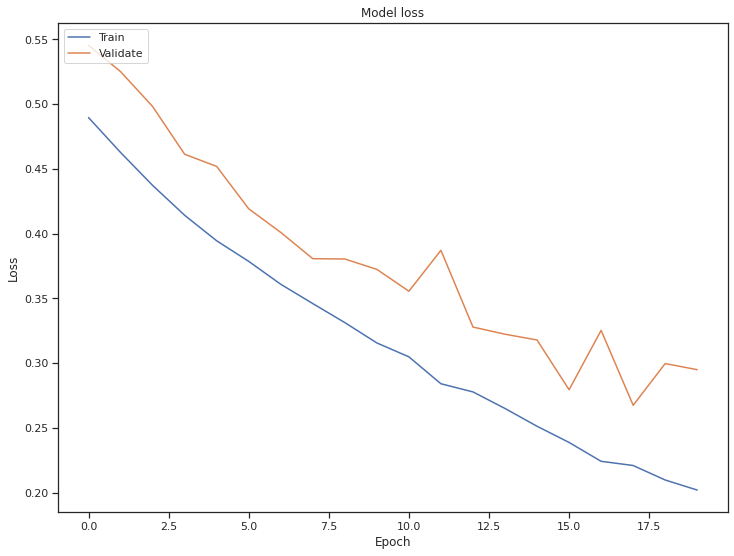

In [0]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [0]:
#--------EVALUATE
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'Accuracy:', acc)

1/1 - 0s - loss: 0.2818 - acc: 0.9583
Loss: 0.28176596760749817 Accuracy: 0.9583333134651184


In [0]:
#--------PREDICT

p_test = model.predict(x_test) # get the log likelihoods
p_test_probabs = tf.nn.softmax(p_test).numpy() # convert to probabilities
p_test_class = np.argmax(p_test_probabs, axis=1) # get the max out of the 3 probabilities
print("Predicted Class:", p_test_class, '\nActuals:\n', y_test.to_string(index=False))
#p_test = model.predict_classes(x_test)
#print(p_test)

Predicted Class: [2 0 1 1 2 1 2 1 1 2 2 0 2 1 1 2 0 2 0 0 0 0 0 0] 
Actuals:
  2
 0
 1
 1
 2
 1
 2
 1
 1
 2
 2
 0
 2
 1
 1
 1
 0
 2
 0
 0
 0
 0
 0
 0


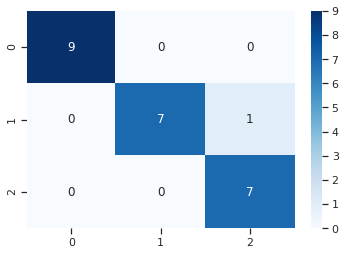

In [0]:
# plot the confision matrix as heatmap
sns.heatmap(tf.math.confusion_matrix(y_test, p_test_class), cmap="Blues", annot=True)